# **AMRN STOCK PRICE PREDICTION USING REGRESSION**    -

##### **Project Type**    - End to End Machine Learning
##### **Contribution**    - Team
#####                       Team Member 1 - Yash Kumar
#####                       Team Member 2 - Taniya Yadav
#####                       Team Member 3 - Vivek Mishra

# **Project Summary -**

The objective of this project is to analyze the closing stock prices of Amarin Corporation plc. It is an Irish-American biopharmaceutical company founded in 1993 and headquartered in Dublin, Ireland and Bridgewater, New Jersey. The company develops and markets medicines for the treatment of cardiovascular disease. The dataset used in this project consisted of daily stock prices of AMRN for the last 1 year from today, including closing, opening, highest, and lowest and adjacent stock prices and volume of shares.

To predict the stock's closing price, I developed four models namely Linear Regression, Ridge_regression, Lasso_regression, and Random Forest model was developed. The model was trained using the historical stock price data and various features such as mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns in the data.The performance of the model was evaluated using metrics like MSE ( Mean Squared Error) because we used LeaveOneOut cross validation so we can't use R2 score.

The analysis aimed to uncover any patterns or changes in stock prices.


Overall, the project aimed to contribute to a better understanding of the relationship between the closing stock prices of AMRN, and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to AMRN's stock.

# **Problem Statement**


Amarin Corporation plc is an Irish-American biopharmaceutical company founded in 1993 and headquartered in Dublin, Ireland and Bridgewater, New Jersey. The company develops and markets medicines for the treatment of cardiovascular disease.It is focused on discovering, developing and delivering innovative treatments and new therapeutic approaches that can make a difference in CVD patients' lives. In addition to the ground-breaking science and clinical development, Amarin is highly motivated to improve patient care while creating value for shareholders and society. These are just some of the BOLD ways we are changing the course of CVD. We fetch this real time actual data through APi with the help of rapidapi platform and this dataset has daily stock prices of the AMRN since one last year and includes closing, opening, highest, lowest and adjacent close stock prices. The main objective is to predict the stock’s closing price.

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

# **Objective**


The ultimate business objective is to leverage the regression model to provide accurate predictions of the closing price of AMRN stock, enabling stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, Early warning systems to alert any fraud cases and align investment strategies with financial goals.

Steps involved are:-

1.Know Your Data

2.Understanding your Data

3.Data Cleaning

4.Data Manipulation

5.Data Visualization

6.Hypothesis Testing

7.Feature Engineering & Data Pre-processing

8.Data Splitting and ML Model Implementation:-

a. Linear Regression

b. Ridge Regression

c. Lasso Regression

d. Random Forest Regressor

# ***Let's Start !***

## ***Step 1. Know Your Data***

### Import Libraries and connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats

In [ ]:
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

### Data Gathering from API

In [ ]:
# import requests

# url = "https://yh-finance.p.rapidapi.com/stock/v3/get-historical-data"

# querystring = {"symbol":"AMRN","region":"US"}

# headers = {
# 	"X-RapidAPI-Key": "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx",
# 	"X-RapidAPI-Host": "yh-finance.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)
# res=response.json()

* Since we have limited api request so we are commenting it and hiding our api key but we fetched our data from this api to get AMRN stock for 1 year.

### Converting it into dataframe and make a csv file

In [ ]:
# data=pd.DataFrame(gh['prices'],columns=['date','open','high','low','close','volume','adjclose'])
# data.to_csv('AMRN_stock_price.csv')

* Converting that data into dataframe and defining it's column names and converting into csv to use further.

### Dataset Loading

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AMRN_stock_price.csv')

### Dataset First View

In [ ]:
# data = pd.read_csv('/content/AMRN_stock_price.csv')
data.head()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
0,0,1707489000,1.25,1.25,1.21,1.22,985700,1.22
1,1,1707402600,1.20,1.25,1.20,1.23,810400,1.23
2,2,1707316200,1.23,1.25,1.19,1.20,931200,1.20
3,3,1707229800,1.17,1.24,1.17,1.23,978500,1.23
4,4,1707143400,1.15,1.20,1.15,1.18,670000,1.18


### Dataset Rows & Columns count

In [ ]:
num_rows, num_cols = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 251
Number of columns: 8


### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  251 non-null    int64  
 1   date        251 non-null    int64  
 2   open        251 non-null    float64
 3   high        251 non-null    float64
 4   low         251 non-null    float64
 5   close       251 non-null    float64
 6   volume      251 non-null    int64  
 7   adjclose    251 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 15.8 KB


### Check for Null/Missing Values

In [ ]:
data.isnull().sum()

Unnamed: 0    0
date          0
open          0
high          0
low           0
close         0
volume        0
adjclose      0
dtype: int64

### Check for duplicated rows

In [ ]:
data.duplicated().sum()

0

### What did you know about your dataset?

* We get this data from yahoo finance by calling there public API to get their AMRN stock price for US region.
This API reproduces live PUBLIC data and features of finance.yahoo.com. The response data is always live and synced with the site at request time. You are going to get almost everything that you see PUBLICLY on the site.

* As per the above information, we can see the columns open, high, low, close are float type while date and volume are int type of data.

**There are 251 rows and 7 columns**

**There are no null values present in our data**

**There are no duplicated rows present in our data**

**The following columns are listed in the DataFrame-**
* Unnamed: 0 - It is a index column of int type.
* date - It describes the date on which prices is defined but it's in encrypted form so we have to handle it and according to offset we have to convert in into datetime.
* open - It describes at what price the stock is open on that date.
* high - It describes the maximum price the stock is on that date.
* low - It describes the minimum price the stock is on that date.
* close- It describes at what price the stock is close on that date.
* volume - It describes the volume of shares on that date.
* adjclose - It describes the adjacent close price on that date.

## ***Step 2. Understanding Our Data***

#### Columns present in our data

In [ ]:
data.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjclose'],
      dtype='object')

#### Mathematical/Statistical description of our data

In [ ]:
data.describe()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
count,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,125.000000,1.691799e+09,1.156614,1.189124,1.119442,1.153386,2.473797e+06,1.153386
std,72.601653,9.101413e+06,0.319761,0.325097,0.304792,0.313870,2.305236e+06,0.313870
min,0.000000,1.676039e+09,0.680000,0.700000,0.650000,0.660000,3.615000e+05,0.660000
25%,62.500000,1.683855e+09,0.885000,0.920000,0.850000,0.885000,1.248500e+06,0.885000
50%,125.000000,1.691761e+09,1.150000,1.190000,1.120000,1.160000,1.895500e+06,1.160000
75%,187.500000,1.699497e+09,1.310000,1.340000,1.260000,1.310000,2.907150e+06,1.310000
max,250.000000,1.707489e+09,2.050000,2.170000,1.970000,2.060000,2.038320e+07,2.060000


In [ ]:
data.columns


Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'adjclose'],
      dtype='object')

There are 251 rows and 7 columns.

There are no null values present in our data.

There are no duplicated rows present in our data.

**The following columns are listed in the DataFrame-**
* Unnamed: 0 - It is a index column of int type.
* date - It is of int data type.
* open - It is of float data type.
* high - It is of float data type.
* low - It is of float data type.
* close- It is of float data type.
* volume - It is of int data type.
* adjclose - It is of float data type.

## ***Step 3. Data Cleaning***

1. firstly we make a copy of our dataset for data cleaning and manipulation to prevent the data loss in future

In [ ]:
df = data.copy()

In [ ]:
df.head()

,Unnamed: 0,date,open,high,low,close,volume,adjclose
0,0,1707489000,1.25,1.25,1.21,1.22,985700,1.22
1,1,1707402600,1.20,1.25,1.20,1.23,810400,1.23
2,2,1707316200,1.23,1.25,1.19,1.20,931200,1.20
3,3,1707229800,1.17,1.24,1.17,1.23,978500,1.23
4,4,1707143400,1.15,1.20,1.15,1.18,670000,1.18


2. here we can see there is a extra `Unnamed` index column present in our dataset so will be drop this column

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

3. lets check for missing values and duplicate rows in our dataset

In [ ]:
df.isnull().sum()

date        0
open        0
high        0
low         0
close       0
volume      0
adjclose    0
dtype: int64

In [ ]:
df.duplicated().sum()

0



*   In our dataset there is no null values
*   there is no duplicated rows

---


  so we will directly going to check for outliars in our dataset



4. Outliars detection and removal

* we have plot Boxplot of all columns to see any potential outliars in our dataset




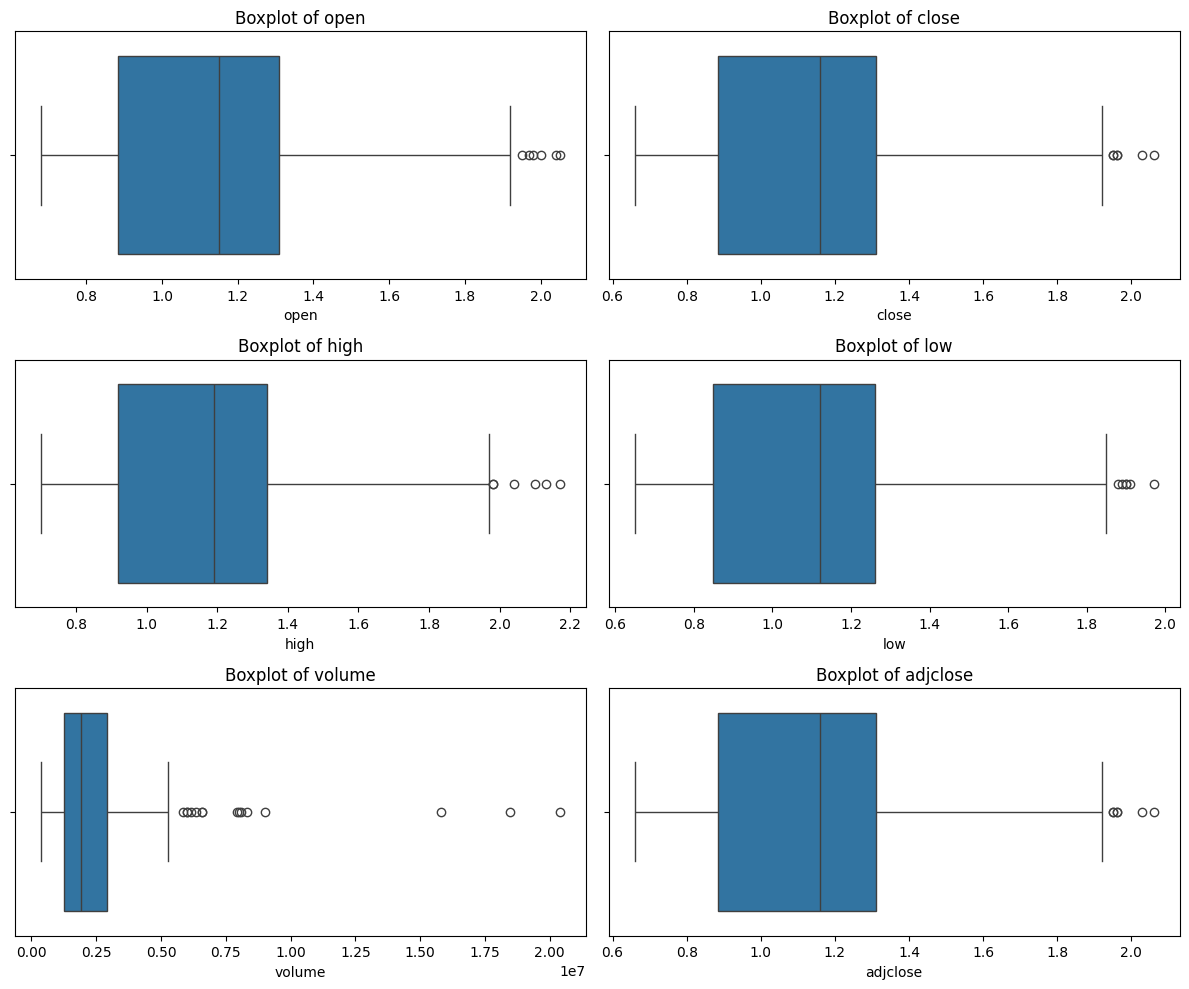

In [ ]:

# Create subplots
key_variables = ['open','close', 'high', 'low',  'volume','adjclose']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot box plots for each variable
for i, variable in enumerate(key_variables):
    sns.boxplot(x=variable, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()


*   we can see there is no significant outliars present in our dataset and some extreme values could be our genuine data points.


## Data Cleaning Summary



*   Dropped `Unnamed : 0` column from our dataset.

*   checked for null and duplicate values in our dataset for removal but there is no any present.
*   plotted boxplot for outliars detection and removal but there were no such significant outliars found.



## ***Step 4. Data Manipulation***

1. in our dataset `Date` was in some other timestamp format so we change the date column to the standard date format

In [ ]:
# timezone_offset = res['timeZone']['gmtOffset']
timezone_offset = -18000

* Here we are directly putting our timezone offset because we know from fetched data but if you don't know then u can uncomment the upper line to get that timezone offset value.

In [ ]:
df['date'] = df['date'].apply(lambda x: datetime.utcfromtimestamp(x) + timedelta(seconds=timezone_offset))
df['date']=pd.to_datetime(df['date']).dt.date

In [ ]:
df.head()

,date,open,high,low,close,volume,adjclose
0,2024-02-09,1.25,1.25,1.21,1.22,985700,1.22
1,2024-02-08,1.20,1.25,1.20,1.23,810400,1.23
2,2024-02-07,1.23,1.25,1.19,1.20,931200,1.20
3,2024-02-06,1.17,1.24,1.17,1.23,978500,1.23
4,2024-02-05,1.15,1.20,1.15,1.18,670000,1.18


2. we sort our dataset by date for further analysis

In [ ]:
df = df.sort_values('date')

3. we set `date` as index and convert it into datetime format

In [ ]:
df.set_index('date',inplace = True)

In [ ]:
# we changed the index of dataset to datetime format for further analysis
df.index= pd.to_datetime(df.index)

In [ ]:
df.head() # here we converted date column into index

,open,high,low,close,volume,adjclose
date,,,,,,
2023-02-10,2.04,2.04,1.88,1.92,3175500,1.92
2023-02-13,1.98,1.98,1.90,1.96,2276400,1.96
2023-02-14,1.92,1.97,1.90,1.96,1711500,1.96
2023-02-15,1.95,1.95,1.89,1.90,2365100,1.90
2023-02-16,1.92,1.93,1.85,1.87,3725100,1.87


## Data Manipulation Summary



*   we changed the `date` column to the standard date format and converted it into `datetime` data Type

*   we sort our dataset by `date` for further analysis

*   we set `date` as index and convert it into datetime format




## ***Step 5. Data Visualization***



###   Chart 1 : Line plot



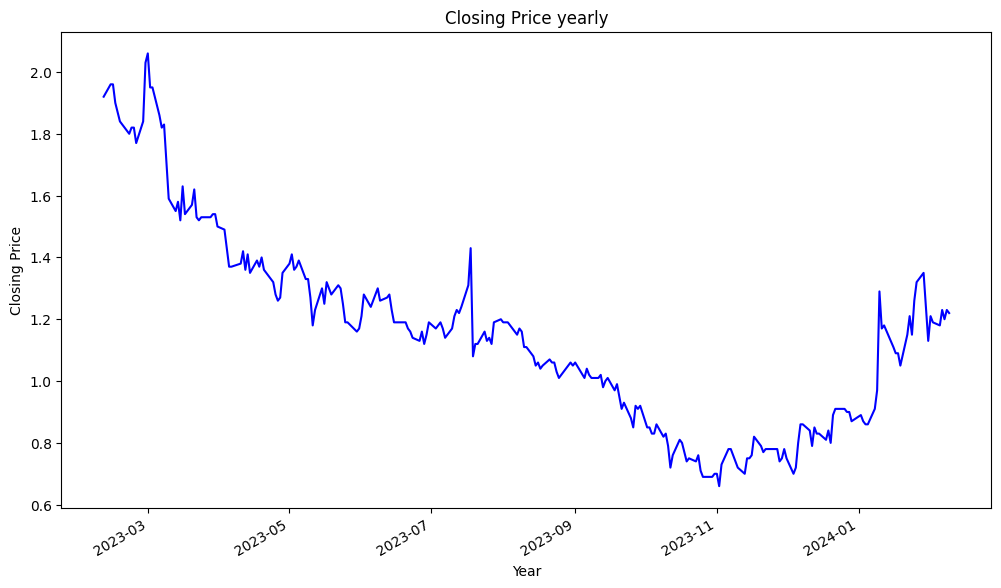

In [ ]:
plt.figure(figsize=(12,7))
df['close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

1. Why did you pick the specific chart?

Since line charts are particularly useful for displaying trends and patterns in data over time so it is appropriate to use this here.

2. What is/are the insight(s) found from the chart?

It can seen that from the 3rd month of 2023 closing price was declining but after the 11th month of the same year it started to increase.

### Chart 2 : Line chart

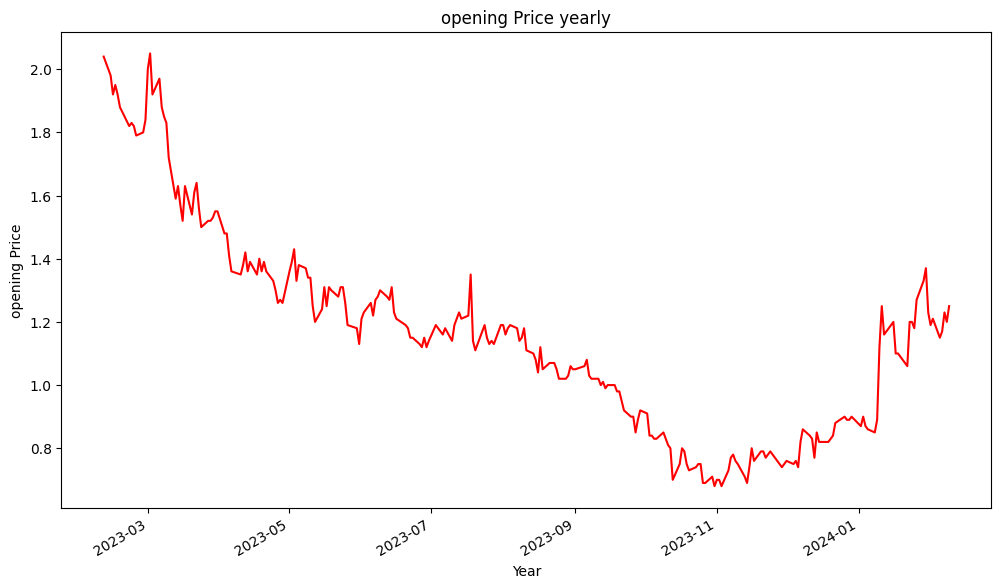

In [ ]:
plt.figure(figsize=(12,7))
df['open'].plot(color = 'r')

plt.xlabel('Year')
plt.ylabel('opening Price')
plt.title('opening Price yearly')
plt.show()

### Chart 3 : Distribution Plot

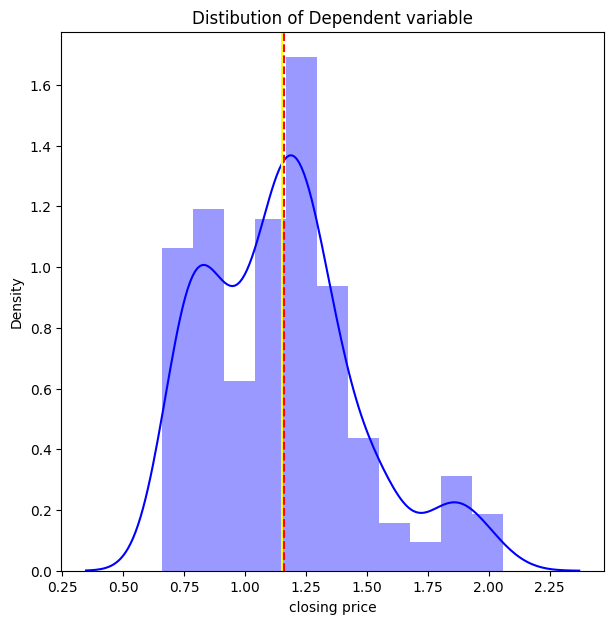

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(df['close'].mean(),color='yellow')
plt.axvline(df['close'].median(),color='red',linestyle='dashed')
plt.show()

1. Why did you pick the specific chart?

This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

We can observe from the data that `close` column is somewhat following normal distribution.
As we are aware that if the data is normally distributed, it becomes easy to develop a good model that can be seen here.

### Chart 4 : Distribution Plot

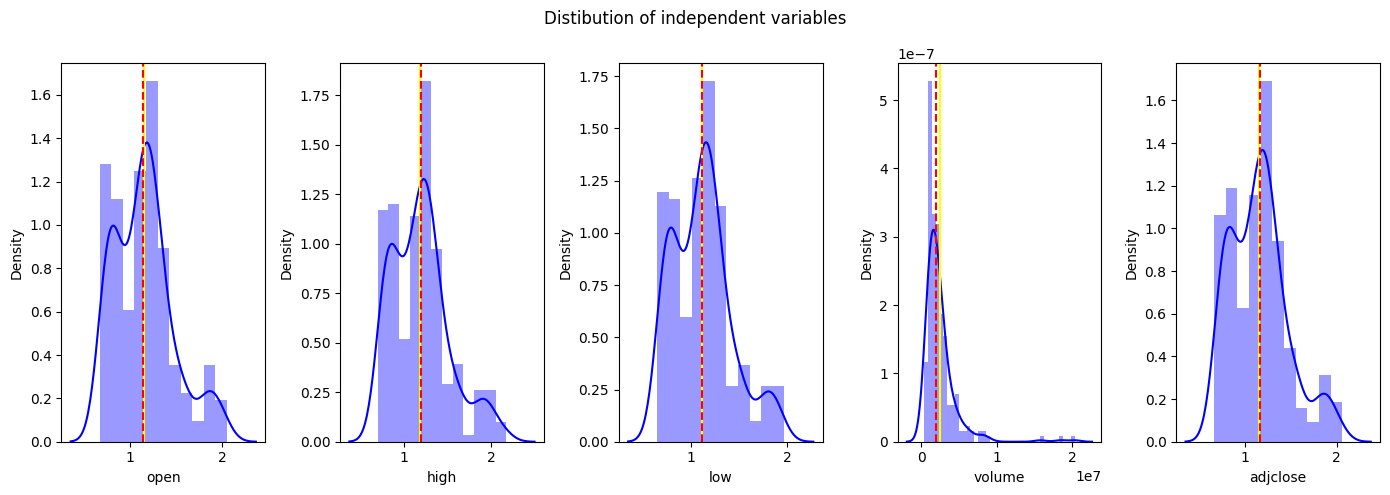

In [ ]:
plt.figure(figsize=(14, 5))
independent_variables = ['open', 'high', 'low',  'volume','adjclose']

for i, col in enumerate(independent_variables):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(), color='yellow')
    plt.axvline(df[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

 This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

All the columns except volume are somewhat following normal distribution but volume column has right skewed distribution.

### Chart 5: Distribution Plot

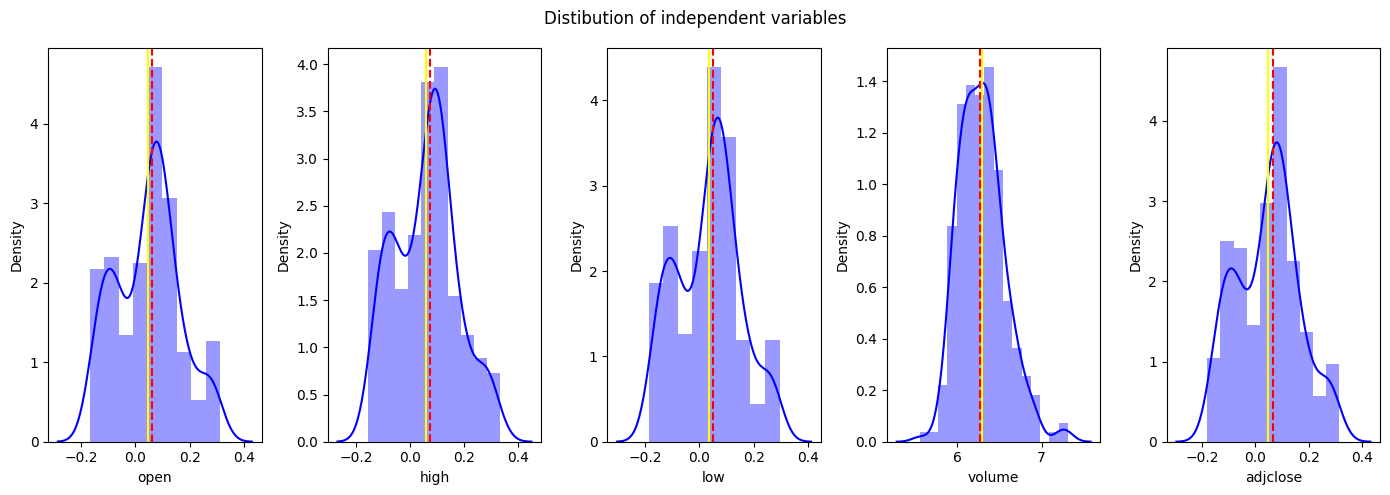

In [ ]:
plt.figure(figsize=(14, 5))
independent_variables = ['open', 'high', 'low',  'volume','adjclose']

for i, col in enumerate(independent_variables):
    plt.subplot(1, 5, i+1)
    sns.distplot(np.log10(df[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(df[col]).mean(), color='yellow')
    plt.axvline(np.log10(df[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

This graph is best suited to see the distributions across different variables.

2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution.

### Chart 6 : Candlestick Chart

In [ ]:
# importing mplfinanace library to plot Candlestick chart
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


<Figure size 1200x600 with 0 Axes>

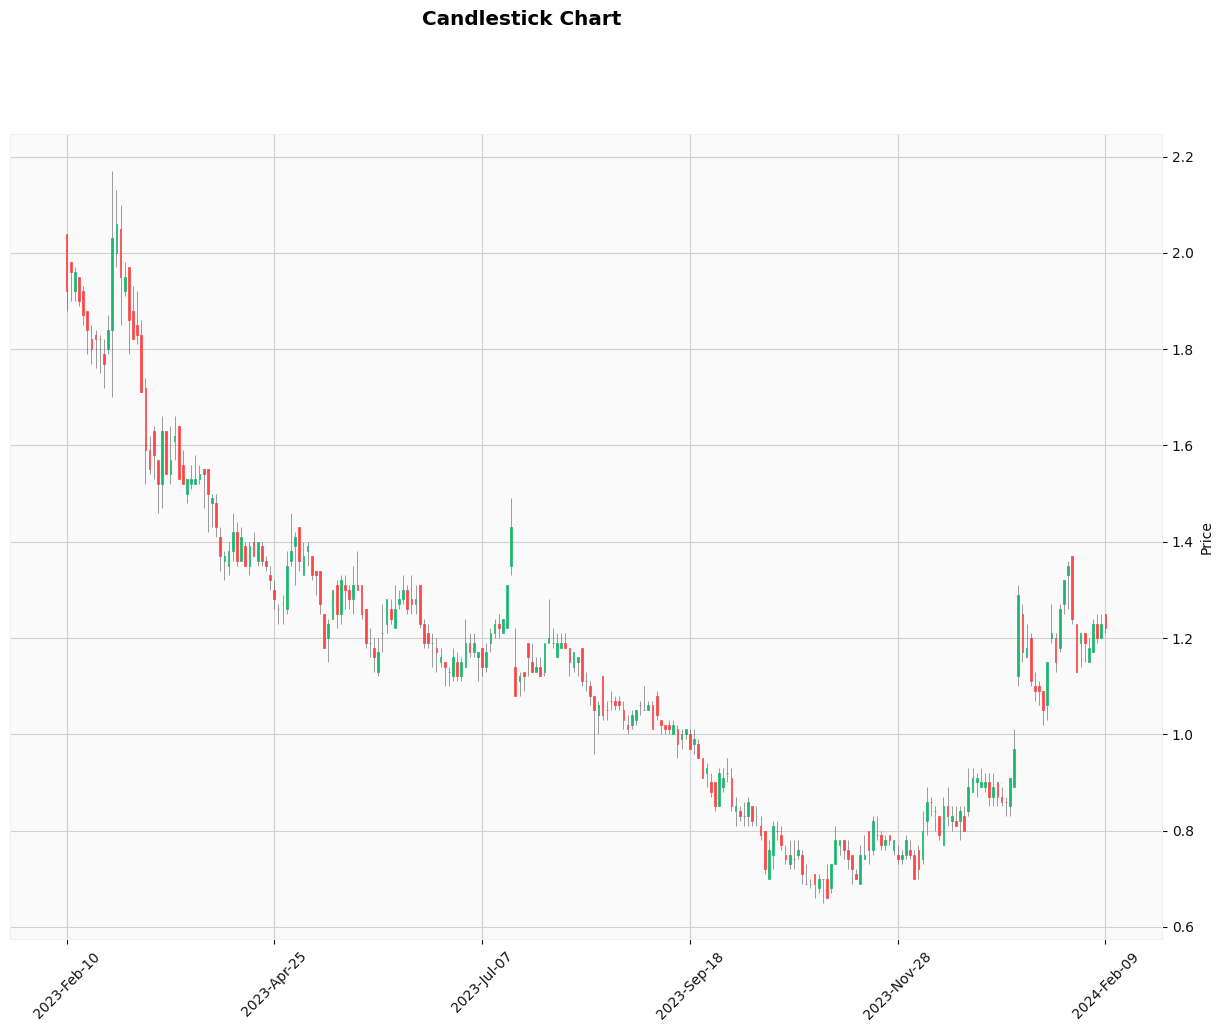

In [ ]:

plt.figure(figsize= (12,6))
import mplfinance as mpf

df_candle = df[['open', 'high', 'low', 'close']]

mpf.plot(df_candle, type='candle', style='yahoo',figscale=2, title='Candlestick Chart')

1. Why did you pick the specific chart?

A candlestick graph is primarily used in technical analysis of financial markets, particularly in stock trading, to visualize the price movements of a financial asset over a specific period of time

2. What is/are the insight(s) found from the chart?

It can be seen from the data that, there is no much deviation from the price shown by open, high, low.
As it is important to make sure that there is no huge variation in the data.

### Chart 7 : Boxplot Chart

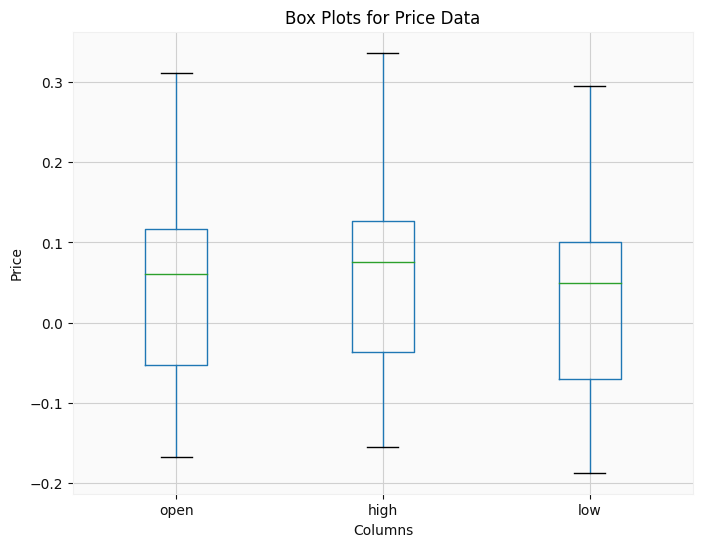

In [ ]:
# we have applied log transformtion in these column before plotting boxplot to get rid of some outliars
df_price = np.log10(df[['open', 'high', 'low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

1. Why did you pick the specific chart?

BoxPlot is used to identify if outliers exists or not in the independent variables.

2. What is/are the insight(s) found from the chart?

We can understand that after transformation is applied, outliers appeared to be diminished.

### Chart 8 : Scatter Plot

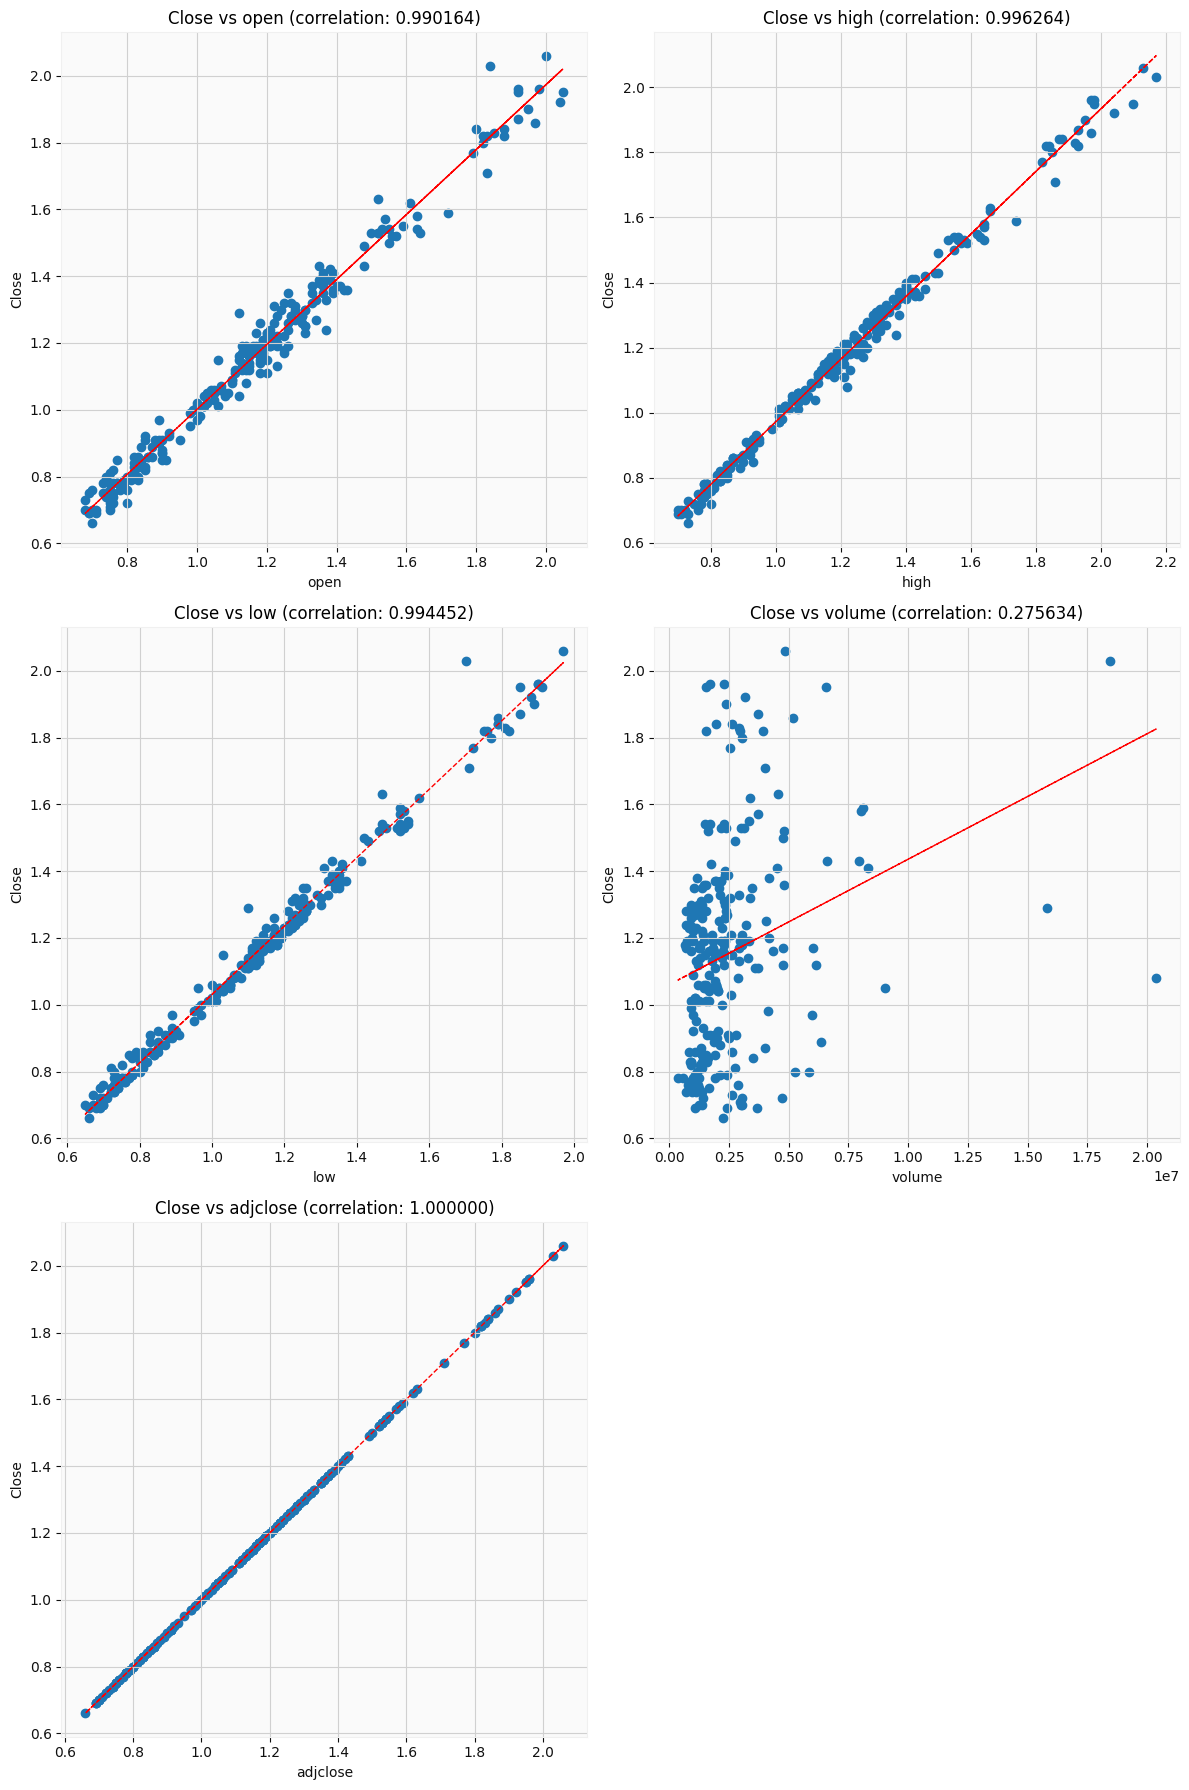

In [ ]:
# Creating Subplots for various scatterplot between numerical columns
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for i, col in enumerate(independent_variables):
    feature = df[col]
    label = df['close']
    correlation = feature.corr(label)

    # Scatter plot
    axes[i // 2, i % 2].scatter(x=feature, y=label)
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('Close')
    axes[i // 2, i % 2].set_title(f'Close vs {col} (correlation: {correlation:.6f})')

    # Linear regression line
    z = np.polyfit(feature, label, 1)
    y_ = np.poly1d(z)(feature)
    axes[i // 2, i % 2].plot(feature, y_, "r--", lw=1)

# Remove any empty plots
for i in range(len(independent_variables), 6):
    fig.delaxes(axes[i // 2, i % 2])

plt.tight_layout()  # Adjust subplot spacing
plt.show()



1. Why did you pick the specific chart?

Scatter plot is used to to understand relationship of numerical columns with each other

2. What is/are the insight(s) found from the chart?

Here we showed relationship of all the independent columns with the dependent column and can understand that all columns except volume column are having linear or sort of linear relationship with dependent column.

### Chart 9 : Heatmap

<Axes: >

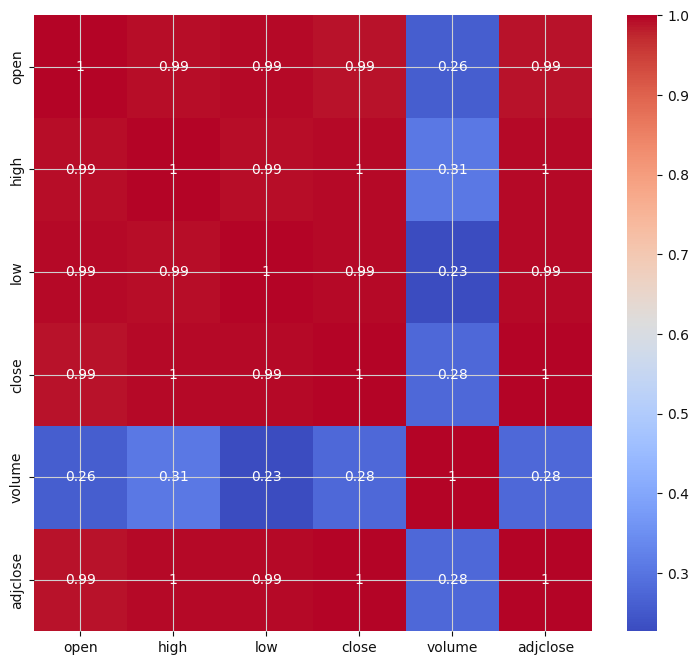

In [ ]:
plt.figure(figsize=(9,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

1. Why did you pick the specific chart?

Heatmap is use to identify the correlation between variables.

2. What is/are the insight(s) found from the chart?

As it is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector so is evident here.

### Chart 10: Pair Plot

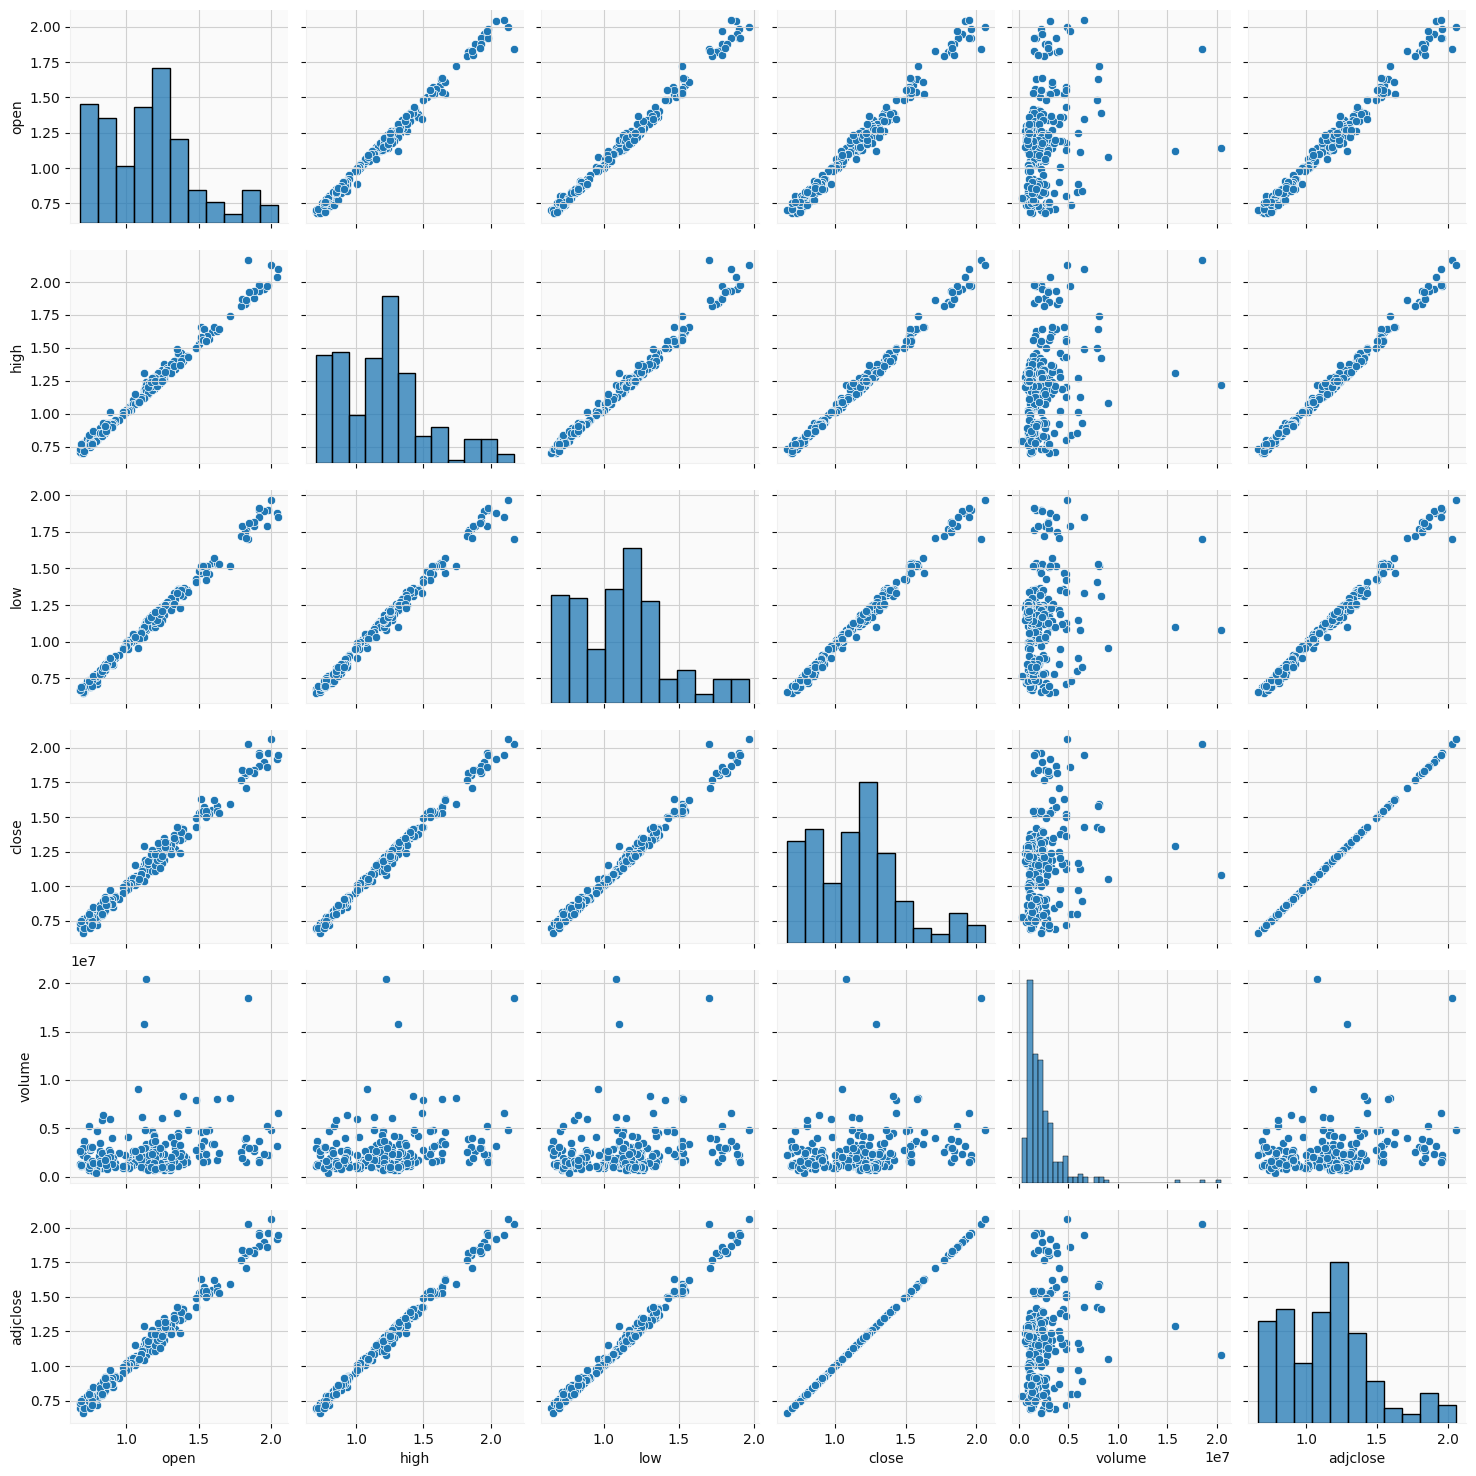

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)
plt.show()

1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables.

2. What is/are the insight(s) found from the chart?

It can be inferred from the above charts that all columns share linear relationship and follow normal distribution except volume column.

## ***Step 6. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset. Perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* We are performing here a hypothesis test to check our stock performance throughout the year to ensure our stock growth or stock decline by making a null hypothesis statement that our stock performance for the first 6 month is same as last 6 months.


* Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first 6 months and the last 6 months of the data.

* Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first 6 months and the last 6 months of the data.

#### 2. Perform an appropriate statistical test.

In [ ]:
start_date = min(df.index.date)
end_date = max(df.index.date)

In [ ]:
start_date = min(df.index.date)
end_date = max(df.index.date)

midpoint_date = start_date + (end_date - start_date) / 2

# Split the data
first_half = df[df.index.date < midpoint_date]
second_half = df[df.index.date >= midpoint_date]

In [ ]:
# Perform Statistical Test to obtain P-Value

# Divide the dataset into two halves: first half and second half
start_date = min(df.index.date)
end_date = max(df.index.date)

midpoint_date = start_date + (end_date - start_date) / 2

# Split the data
first_half = df[df.index.date < midpoint_date]
second_half = df[df.index.date >= midpoint_date]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half['close'])
mean2 = np.mean(second_half['close'])
std1 = np.std(first_half['close'])
std2 = np.std(second_half['close'])

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

se1 = std1 / np.sqrt(n1)
se2 = std2 / np.sqrt(n2)

# Calculate the standard error of the difference between means
standard_error = np.sqrt(se1**2 + se2**2)

# Calculate the t_test
t_stat = (mean1 - mean2) / standard_error

#Significance level
alpha = 0.05

#Degree of freedom
dodf = n1 + n2 - 2

#calculating probability point function
cv = stats.t.ppf(1.0 - alpha, dodf)

# Calculate the p-value (two-tailed test)
p_value = (1 - stats.t.cdf(abs(t_stat), dodf)) * 2

# Set the significance level
alpha = 0.05

print('The p value for 0.05 significance level is {:.5f}'.format(p_value))

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

The p value for 0.05 significance level is 0.00000
Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value and why?

* We performed t test here to optain p value as we have a sample dataset and we are making inference about population and our population parameters are not known to us.

## ***Step 7. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#There are no missing values in the dataset.

df.isnull().sum()

open        0
high        0
low         0
close       0
volume      0
adjclose    0
dtype: int64

### 2. Handling Outliers

In [ ]:
#Transformation has taken care of outliers, so no need to treat outliers.

* We already handled our outliers previously and did transformation.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

* There are no categorical variables in this dataset.

### 4. Feature Manipulation & Selection

#### a. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean
#from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


df['mean_ol'] = round(df[['open', 'high', 'low']].mean(axis=1),2)
df.head()

,open,high,low,close,volume,adjclose,mean_ol
date,,,,,,,
2023-02-10,2.04,2.04,1.88,1.92,3175500,1.92,1.99
2023-02-13,1.98,1.98,1.90,1.96,2276400,1.96,1.95
2023-02-14,1.92,1.97,1.90,1.96,1711500,1.96,1.93
2023-02-15,1.95,1.95,1.89,1.90,2365100,1.90,1.93
2023-02-16,1.92,1.93,1.85,1.87,3725100,1.87,1.90


* Here we have a very high correlation between open, high, and low columns so to reduce the multicollinearity of our data we are combing all these columns by calculating the mean of all these to reduce multicollinearity without losing its glimpse.

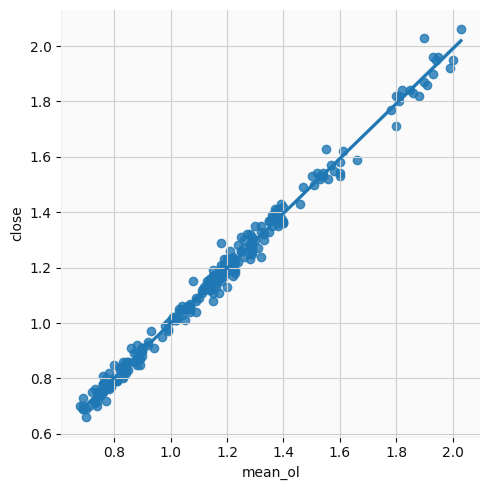

In [ ]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='mean_ol', y='close', fit_reg=True,data=df)

* Here we are checking that realtionship between that combined mean column and our close price and we can see we have a linear relationship.

<Axes: xlabel='mean_ol', ylabel='Density'>

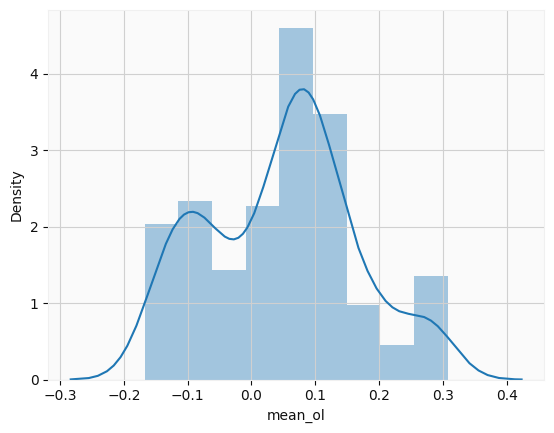

In [ ]:
tri_al=np.log10(df['mean_ol'])
sns.distplot(tri_al)

* After transforming our mean column, we are checking for its distribution.

In [ ]:
for i in range(1, 11):
    df["lag_{}".format(i)] = df.mean_ol.shift(i)

* Here to capture the temporal trends and patterns in the data we are taking lag terms last 10 days to get an idea how our share is performing, so we are doing a lag so we can get a glimpse or generalized pattern of our share like we as a human do before buying the share we analyzed how that particular share is doing for the last some days.

In [ ]:
df.head()

,open,high,low,close,volume,adjclose,mean_ol,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
date,,,,,,,,,,,,,,,,,
2023-02-10,2.04,2.04,1.88,1.92,3175500,1.92,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-13,1.98,1.98,1.90,1.96,2276400,1.96,1.95,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-14,1.92,1.97,1.90,1.96,1711500,1.96,1.93,1.95,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-15,1.95,1.95,1.89,1.90,2365100,1.90,1.93,1.93,1.95,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-16,1.92,1.93,1.85,1.87,3725100,1.87,1.90,1.93,1.93,1.95,1.99,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Feature Selection

In [ ]:
#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = df.dropna().close.values
x_independ = df.dropna().drop(['close','open','high','low','adjclose'], axis=1)  #adjclose is same like close

* Here we are dropping all these highly correalated columns because it can hamper our result and we already took mean of that and we are taking that mean instead of all these columns and adjclose is a duplicate column of close price that is our target column so we have to drop it because it's of no use.
* We are dropping all our NaN values because we already took generalization and our ML model cannot take NaN values.

In [ ]:
x_independ.head()

,volume,mean_ol,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
date,,,,,,,,,,,,
2023-02-27,1946600,1.82,1.78,1.80,1.81,1.81,1.85,1.90,1.93,1.93,1.95,1.99
2023-02-28,18472400,1.90,1.82,1.78,1.80,1.81,1.81,1.85,1.90,1.93,1.93,1.95
2023-03-01,4840600,2.03,1.90,1.82,1.78,1.80,1.81,1.81,1.85,1.90,1.93,1.93
2023-03-02,6574100,2.00,2.03,1.90,1.82,1.78,1.80,1.81,1.81,1.85,1.90,1.93
2023-03-03,1530600,1.94,2.00,2.03,1.90,1.82,1.78,1.80,1.81,1.81,1.85,1.90


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,we have used log transformation because in `volume` column there is very large values present that can dominate other columns in prediction and little bit of skewed also.
Hence it will normalise our indepandent variables for further analysis.

In [ ]:
x_trans=x_independ.copy()
for i in x_independ.columns:
  x_trans[i]=np.log10(x_independ[i])

In [ ]:
y_trans = pd.DataFrame(np.log10(y_depend))

In [ ]:
x_trans.head()

,volume,mean_ol,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
date,,,,,,,,,,,,
2023-02-27,6.289277,0.260071,0.250420,0.255273,0.257679,0.257679,0.267172,0.278754,0.285557,0.285557,0.290035,0.298853
2023-02-28,7.266523,0.278754,0.260071,0.250420,0.255273,0.257679,0.257679,0.267172,0.278754,0.285557,0.285557,0.290035
2023-03-01,6.684899,0.307496,0.278754,0.260071,0.250420,0.255273,0.257679,0.257679,0.267172,0.278754,0.285557,0.285557
2023-03-02,6.817836,0.301030,0.307496,0.278754,0.260071,0.250420,0.255273,0.257679,0.257679,0.267172,0.278754,0.285557
2023-03-03,6.184862,0.287802,0.301030,0.307496,0.278754,0.260071,0.250420,0.255273,0.257679,0.257679,0.267172,0.278754


### 6. Data Scaling

In [ ]:
# After log Trnasformation our dataset is already in same scale so no need to Data Scalling Further

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As we have only few features, dimensionality reduction is not necessary because if we reduce of dataset dimensions further it will lead to underfitting.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, our dataset is not imbalanced.

## ***Step 8. Data Splitting and ML Model Implementation***

##### ML Model 1:- Linear Regression



*  Here we used `LeaveOneOut` cross validation technique to split our data because our dataset is small in size and it will give good results



In [ ]:
model = LinearRegression()

loo=LeaveOneOut()

scores = cross_val_score(model, x_trans, y_trans, cv=loo, scoring='neg_mean_squared_error')
prediction=cross_val_predict(model, x_trans, y_trans, cv=loo)

# we have salected MSE as our Evaluation Matrix in all models for evaluating their performance.
# As R2 Score will not give good results in LeaveOneOut CV

# Print the average score (mean squared error in this case)
print("Average negative mean squared error:", -scores.mean())
# print("Predictions:", prediction)

Average negative mean squared error: 0.0001166927072257785


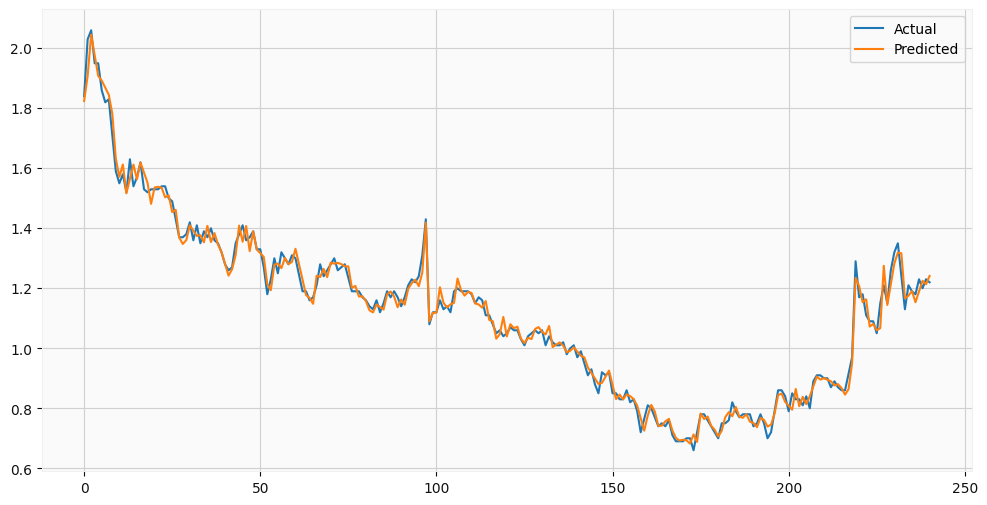

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_trans))
plt.plot(10**((prediction)))
plt.legend(["Actual","Predicted"])
plt.show()

  * After applying Linear regression we can see it is not giving very good results as it tries to overfitt.

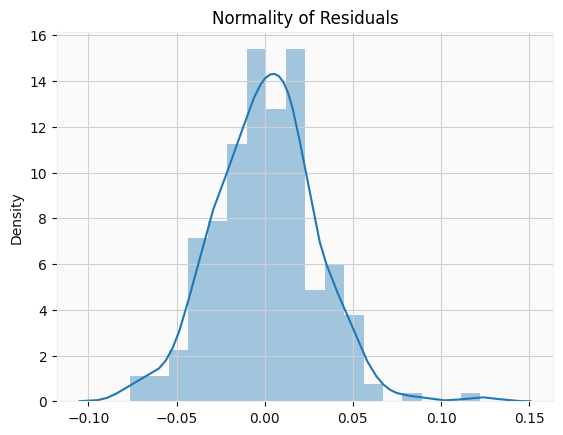

In [ ]:
residuals = 10**(y_trans)-10**(prediction)
sns.distplot(pd.DataFrame(residuals))
plt.title('Normality of Residuals')
plt.show()

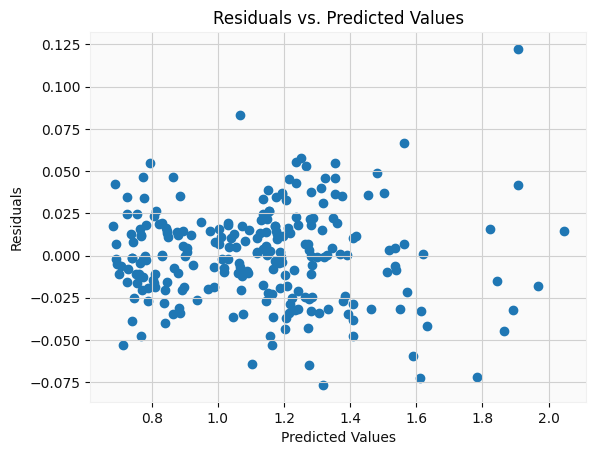

In [ ]:
#Homoscadasticity
residuals = 10**(y_trans)-10**(prediction)

# Plot the residuals against the predicted values
plt.scatter( 10**(prediction),residuals[0])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

###RIDGE with Cross Validation and Hyper parameter tuning

In [ ]:
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x_trans,y_trans)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " MSE: ", -ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  MSE:  0.0001172464907976482


In [ ]:
y_train_pred_ridge = ridge_regressor.predict(x_trans)

In [ ]:
len(y_train_pred_ridge)

241

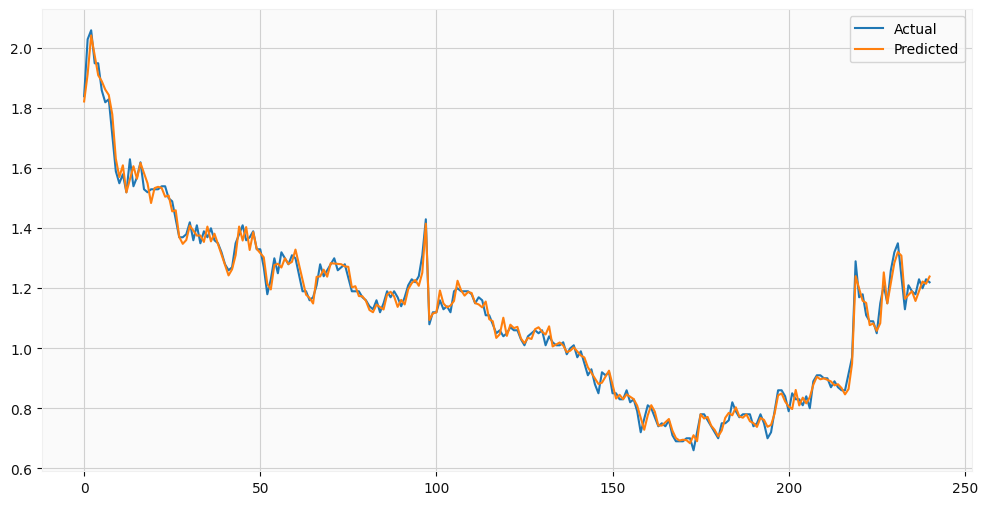

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_trans))
plt.plot(10**((y_train_pred_ridge)))
plt.legend(["Actual","Predicted"])
plt.show()



*   After applying RIDGE Regression not very much improvement can be seen in model.



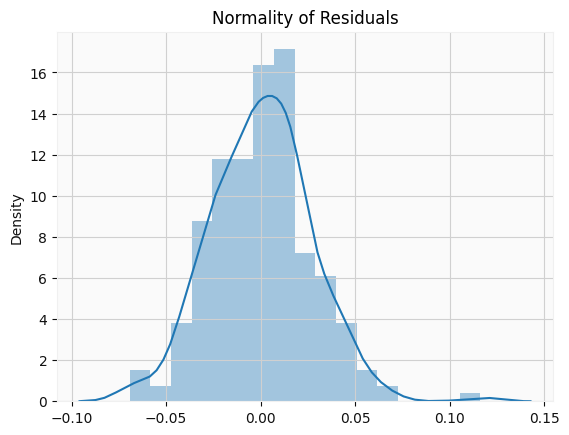

In [ ]:
residuals = 10**(y_trans)-10**(y_train_pred_ridge)
sns.distplot(pd.DataFrame(residuals))
plt.title('Normality of Residuals')
plt.show()

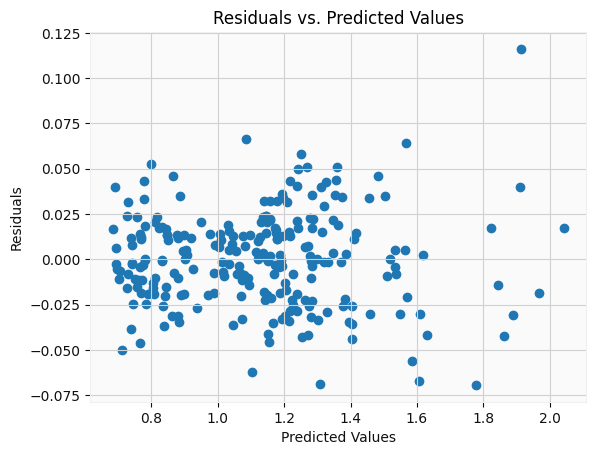

In [ ]:
#Homoscadasticity
residuals = 10**(y_trans)-10**(y_train_pred_ridge)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_train_pred_ridge),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

###Lasso with Cross Validation and Hyper parameter tuning

In [ ]:
lasso = Lasso()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
lasso_regressor = GridSearchCV(lasso, parameters2, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_trans,y_trans)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " MSE: ", -lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  MSE:  0.00011283835050081332


In [ ]:
y_train_pred_lasso = lasso_regressor.predict(x_trans)

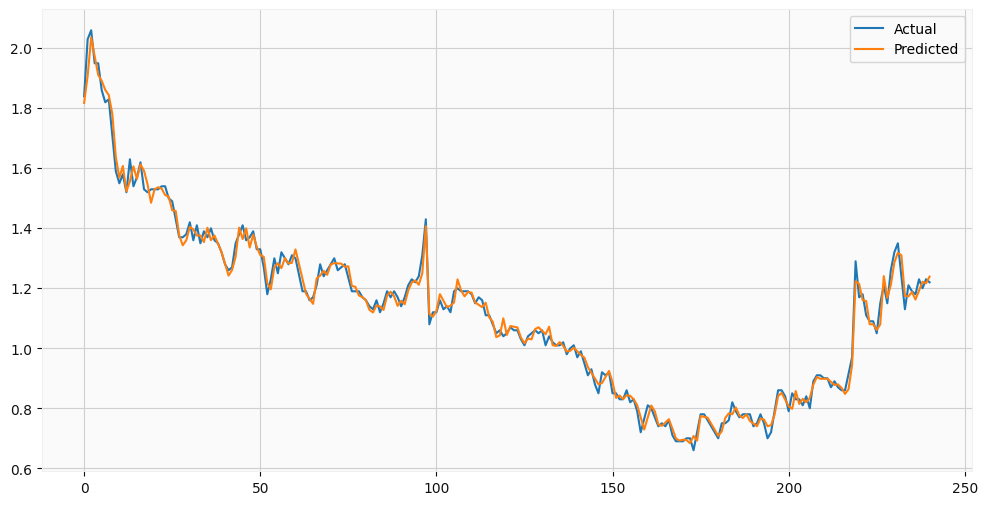

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_trans))
plt.plot(10**((y_train_pred_lasso)))
plt.legend(["Actual","Predicted"])
plt.show()



*   we can see after applying Lasso there is some improvements in model as compared to later as model tries to generalise data.


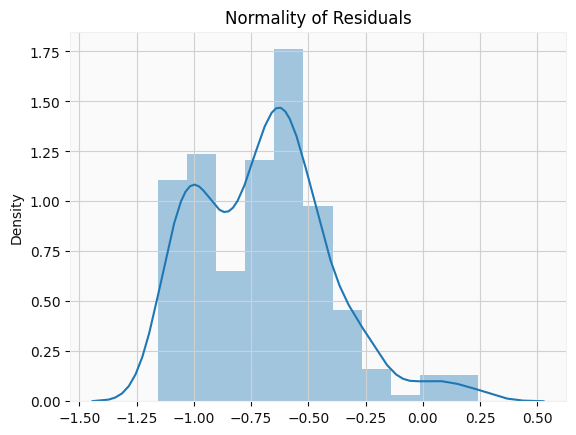

In [ ]:
residuals = 10**(y_trans)-10**(pd.Series(y_train_pred_lasso))
sns.distplot(pd.DataFrame(residuals))
plt.title('Normality of Residuals')
plt.show()

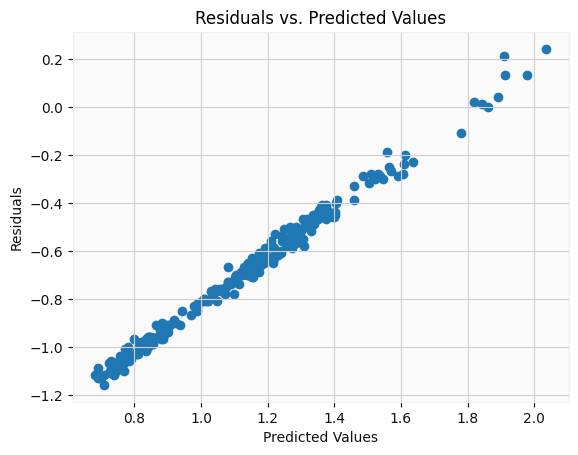

In [ ]:
#Homoscadasticity
residuals = 10**(y_trans)-10**(pd.Series(y_train_pred_lasso))

# Plot the residuals against the predicted values
plt.scatter( 10**(pd.Series(y_train_pred_lasso)),residuals[0])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

### ML Model - 2

I am going to implement `RandomForest` model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.

In [ ]:
# ML Model - 2 Implementation

rf = RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=20,
                      n_estimators=50)

# Fit the Algorithm
rf.fit(x_trans,y_trans)

# Predict on the model
y_pred_trans_rf =rf.predict(x_trans)

In [ ]:
train_MSE_rf  = mean_squared_error(10**(y_trans), 10**(y_pred_trans_rf))
print("MSE :" , train_MSE_rf)

MSE : 0.0015072635425210045


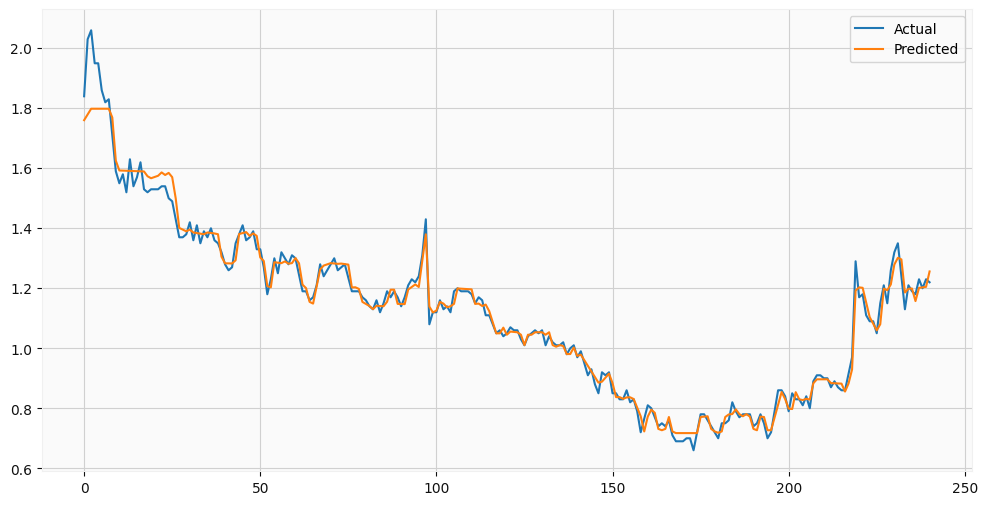

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_trans))
plt.plot(10**((y_pred_trans_rf)))
plt.legend(["Actual","Predicted"])
plt.show()

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_trans, y_trans)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   1.5s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   1.5s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.6s
[CV] END max_depth=2, min_samples_leaf=10, min_samples_split=100, n_estimators=200; total time=   0.6s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=8

In [ ]:
best_model_rf_rs.feature_importances_
print(best_model_rf_rs)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)


In [ ]:
y_pred_trans_rf_rs= random_search.predict(x_trans)

In [ ]:
-random_search.score(x_trans,y_trans)

7.889080546808426e-05

In [ ]:
train_MSE_rf_rs  = mean_squared_error(10**(y_trans), 10**(y_pred_trans_rf_rs))
print("MSE :" , train_MSE_rf_rs)

MSE : 0.0007206633794785485


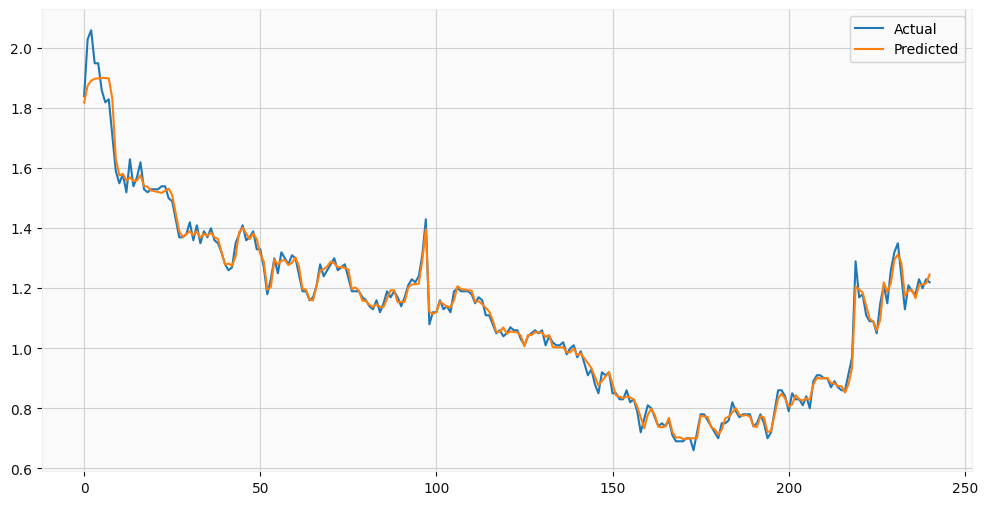

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_trans))
plt.plot(10**((y_pred_trans_rf_rs)))
plt.legend(["Actual","Predicted"])
plt.show()

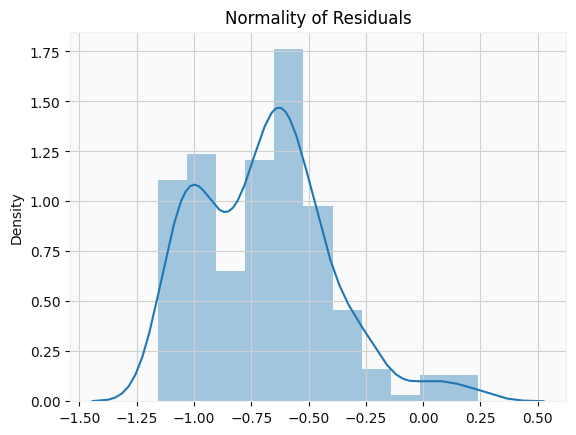

In [ ]:
residuals = 10**(y_trans)-10**(pd.Series(y_pred_trans_rf_rs))
sns.distplot(residuals)
plt.title('Normality of Residuals')
plt.show()

In [ ]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
        'LinearRegression_ridge': {
        'model': Ridge(),
        'params': {'alpha':[0.001]}
    },
        'LinearRegression_lasso': {
        'model': Lasso(),
        'params': {'alpha':[1e-05]}
    },
        'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'max_depth':[40], 'min_samples_leaf':[2],
            'min_samples_split':[20],
                      'n_estimators':[50]
        }
    },
        }

In [ ]:
# for model_name, model_params in models.items():
#     gs = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='neg_mean_squared_error')
#     gs.fit(x_trans, y_trans)
    # print(f"Best parameters for {model_name}: {gs.best_params_}")
    # print(f"Best score for {model_name}: {-gs.best_score_}")
results = []

for model_name, model_params in models.items():
    gs = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='neg_mean_squared_error')
    gs.fit(x_trans, y_trans)
    results.append({
        'Model': model_name,
        'Best Parameters': gs.best_params_,
        'Best Score': -gs.best_score_
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

results_df

,Model,Best Parameters,Best Score
0,LinearRegression,{},0.000114
1,LinearRegression_ridge,{'alpha': 0.001},0.000114
2,LinearRegression_lasso,{'alpha': 1e-05},0.000112
3,RandomForest,"{'max_depth': 40, 'min_samples_leaf': 2, 'min_...",0.002307
